In [69]:
from kagglehub import KaggleDatasetAdapter
import kagglehub,os

file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path)

In [70]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [71]:
df.duplicated().sum()

np.int64(0)

In [72]:
df=df.drop(columns=['customerID'])

In [73]:
categorical_cols=[]
numerical_cols=[]

for col in df.columns:
    if df[col].nunique()>15:
        numerical_cols.append(col)
    elif df[col].nunique()<15:
        categorical_cols.append(col)
    else:
        categorical_cols.append(col)

In [74]:
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [75]:
categorical_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [76]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

encoded_values=encoder.fit_transform(df[categorical_cols])

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_en=pd.DataFrame(encoded_values,columns=encoder.get_feature_names_out(categorical_cols),index=df.index)

X=df_en.drop(columns=['Churn_No','Churn_Yes'])
y=df_en['Churn_Yes']

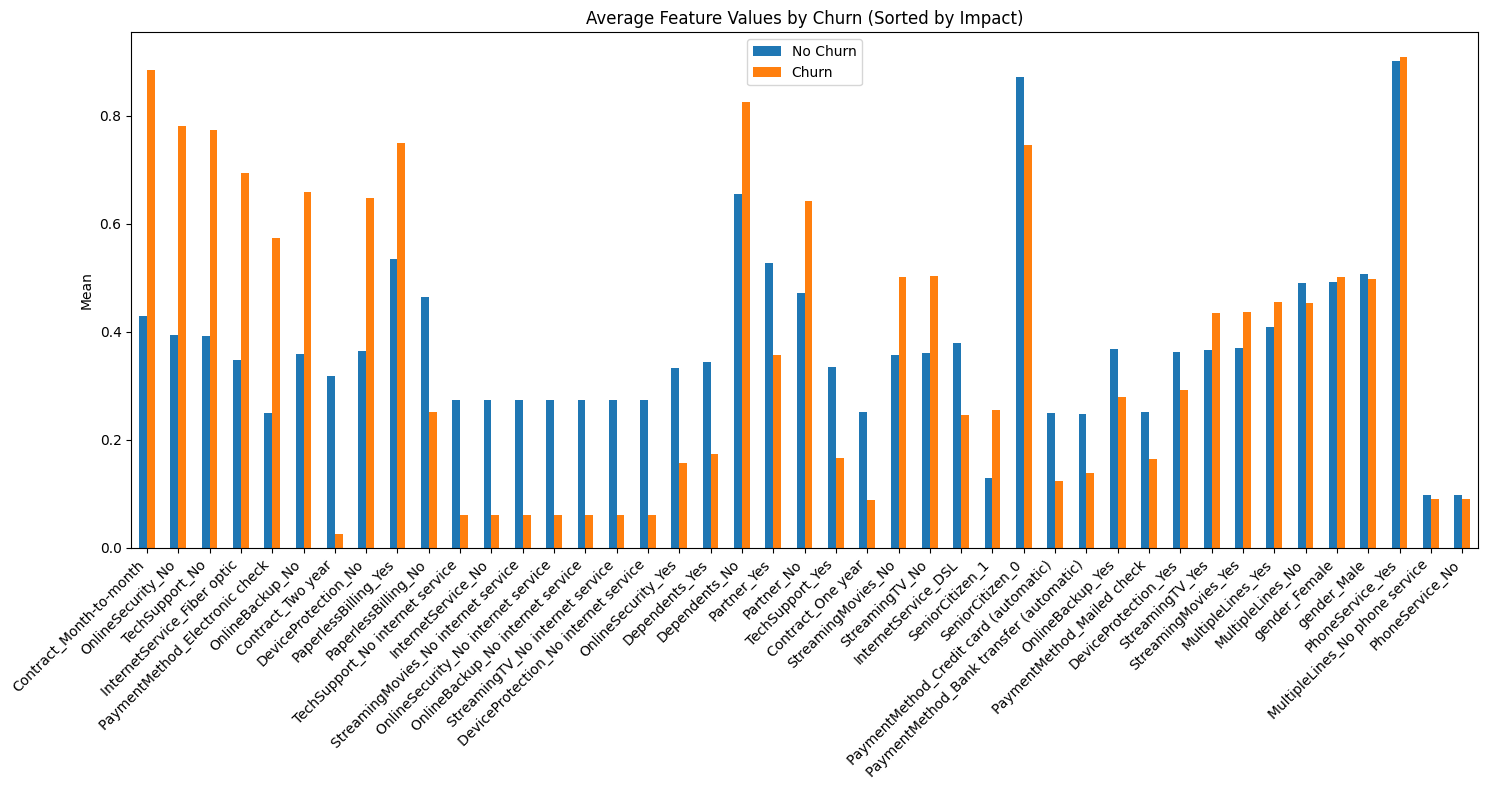

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df_en.select_dtypes(include='number').columns

#corr = df_en[num_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

num_cols = num_cols.drop(['Churn_No', 'Churn_Yes'])

mean_by_churn = df_en.groupby('Churn_Yes')[num_cols].mean().T
mean_by_churn.columns = ['No Churn', 'Churn']

mean_by_churn['Diff'] = abs(
    mean_by_churn['Churn'] - mean_by_churn['No Churn']
)

mean_by_churn_sorted = mean_by_churn.sort_values(
    by='Diff',
    ascending=False
)

mean_by_churn_sorted.drop(columns='Diff').plot(
    kind='bar',
    figsize=(15, 8)
)

plt.title('Average Feature Values by Churn (Sorted by Impact)')
plt.ylabel('Mean')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
